In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [ ]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 38.1 MB/s eta 0:00:00


# Inference

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [ ]:
#config = Cfg.load_config_from_name('vgg_transformer')
config = Cfg.load_config_from_file('/content/drive/MyDrive/Colab Notebooks/AIprj/config.yml')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
config['weights'] = '/content/drive/MyDrive/Colab Notebooks/AIprj/weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [ ]:
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# THỬ TÍ

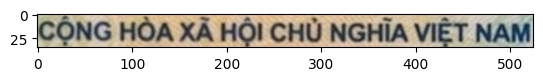

CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM


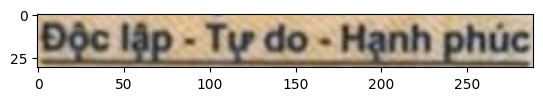

Độc lập - Tự do - Hạnh phúc


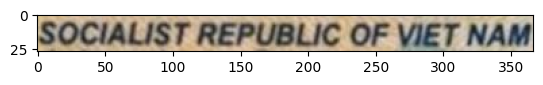

IN SOCIALIST REPUBLIC OF VIET NAM


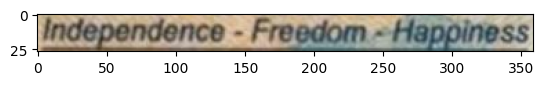

1991 Independence - Freedom - Happiness Happing


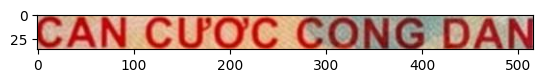

CAN CƯỚC CÔNG DÂN TỐ


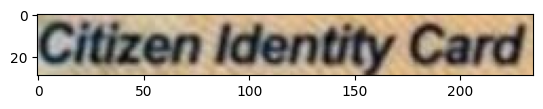

Citizen Identity Card


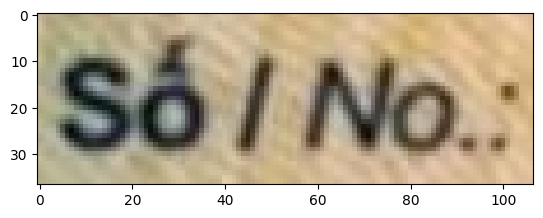

Số I No.


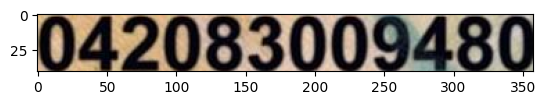

042083009480


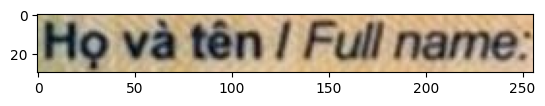

Họ và tên I Full name:


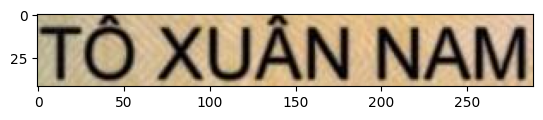

TÔ XUÂN NAM


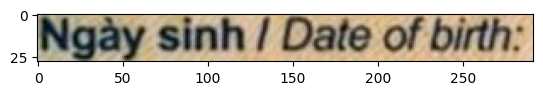

Ngày sinh / Date of birth:


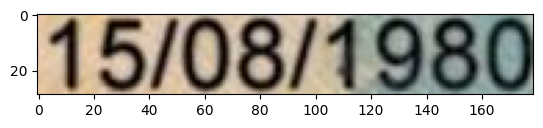

15/08/1980


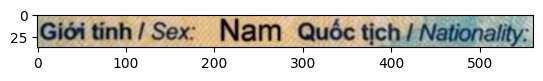

Giới tính/ Sex: Nam Quốc tịch/Nationality


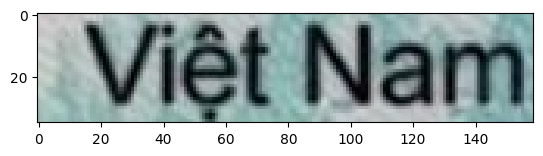

Việt Nam


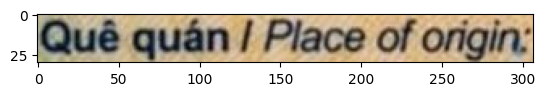

Quê quán I Place of origin;


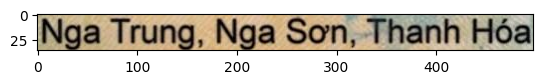

- Nga Trung, Nga Sơn, Thanh Hóa


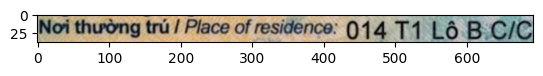

Nơi thường trú I Place of residence: 014 T1 Lô B.C/C


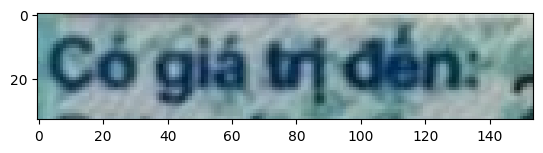

Có giá trị đến


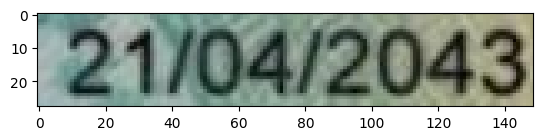

21/04/2043


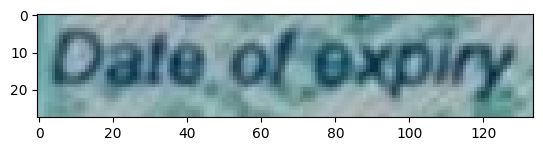

Date of expiry


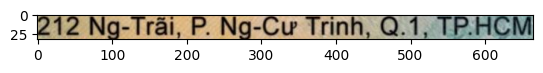

212 Ng-Trãi, P. Ng-Cư Trinh, Q.1, TP.HCM


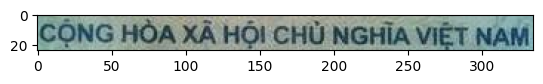

CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM


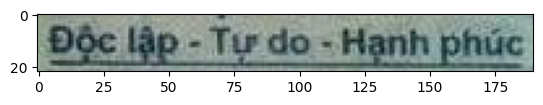

Độc lập - Tự do - Hạnh phúc


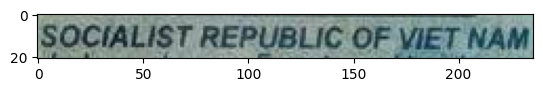

SOCIALIST REPUBLIC OF VIET NAM


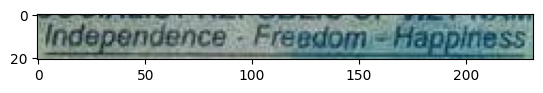

Independence Freedom Happiness


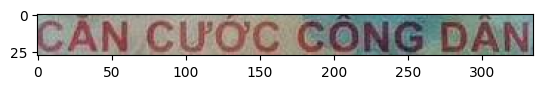

CẦN CƯỚC CÔNG DÂN


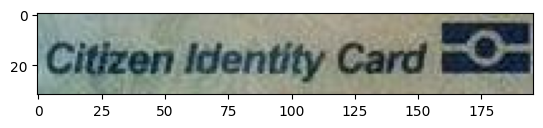

Citizen Identity Card C


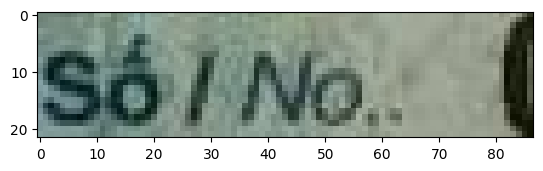

Số I No. C


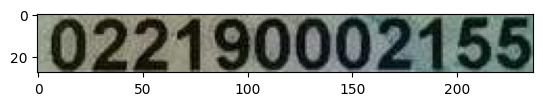

022190002155


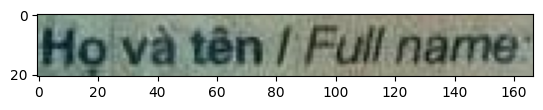

Họ và tên/ Full name:


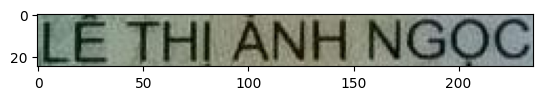

LÊ THỊ ÁNH NGỌC


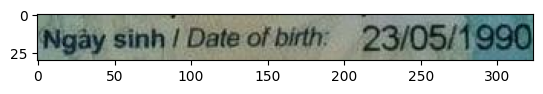

Ngày sinh / Date of birth: 23/05/1990


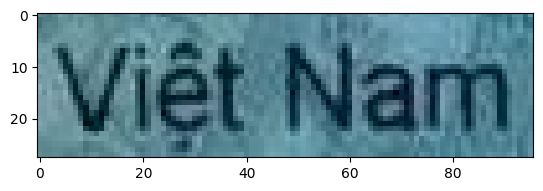

Việt Nam


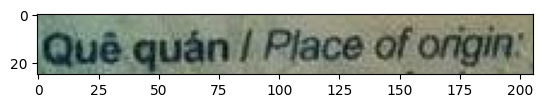

Quê quán I Place of origin


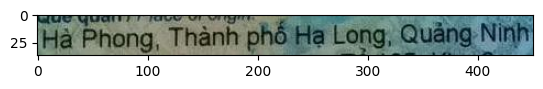

Hà Phong, Thành phố Hạ Long, Quảng Ninh


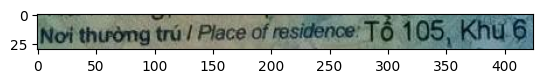

Nơi thường trú/ Place of residence: Tổ 105, Khư 6


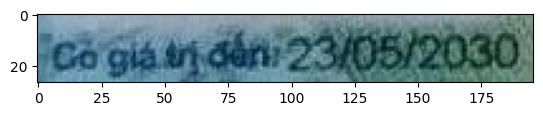

Có giá trị đến: 23/05/2030


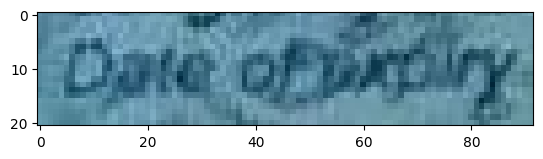

Date of indiry


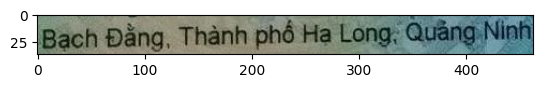

Bạch Đằng, Thành phố Hạ Long, Quảng Ninh


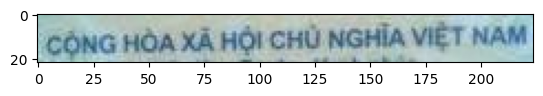

CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM


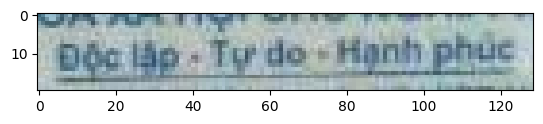

Độc lập Tự do Hạnh phúc


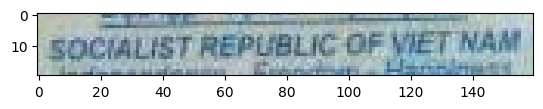

socialist republic of vietnam


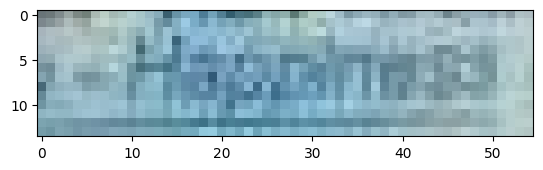

Happiness


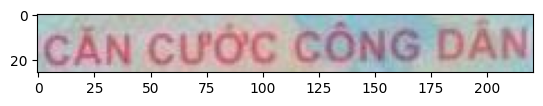

CĂN CƯỚC CÔNG DÂN


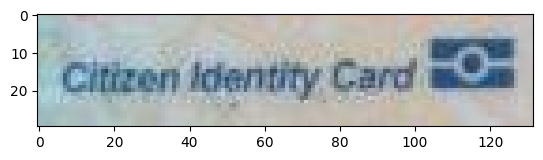

Citizen Identity Card FO


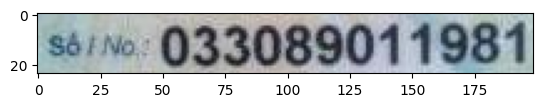

033089011981


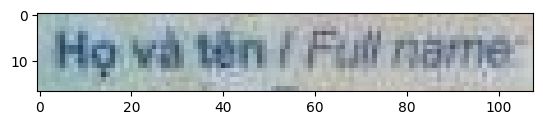

Họ và tên/Full name


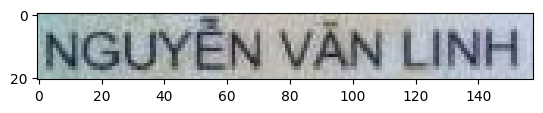

NGUYỄN VĂN LINH


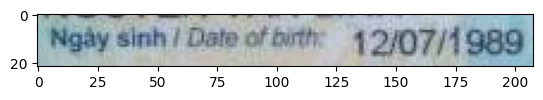

Ngày sinh 1 Date of birth: 12/07/1989


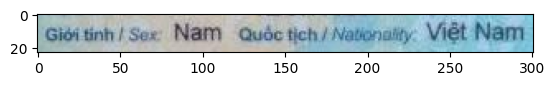

Giới tính / Sex: Nam Quốc tịch/Nationality Việt Nam


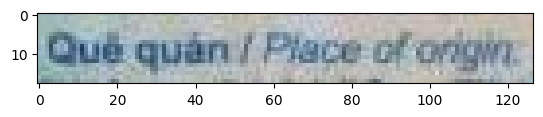

Quê quán/ Piace of origin


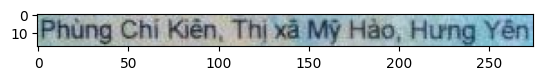

Phùng Chí Kiên, Thị xã mỹ hảo, hưng yên


KeyboardInterrupt: ignored

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image


sample_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/output_chip1/'
for filename in os.listdir(sample_folder):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Construct the full path to the image
        img_path = os.path.join(sample_folder, filename)

        # Open the image using PIL
        img = Image.open(img_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.show()

        # Perform the prediction using the detector
        prediction = detector.predict(img)

        # Print or use the prediction as needed
        print(prediction)

# Lấy prediction để đánh giá

In [ ]:
import os
from PIL import Image
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

def save_individual_predictions(sample_folder, output_folder):

    # Check if the output folder exists, create it if not
    os.makedirs(output_folder, exist_ok=True)

    # Loop through each file in the sample folder
    count = 0
    for filename in os.listdir(sample_folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            # Construct the full path to the image
            img_path = os.path.join(sample_folder, filename)

            # Open the image using PIL
            img = Image.open(img_path)

            # Perform the prediction using the detector
            prediction = detector.predict(img)

            # Remove the file extension from the original image file name
            base_filename, _ = os.path.splitext(filename)

            # Construct the path for the text file without ".jpg" extension
            text_file_path = os.path.join(output_folder, f"{base_filename}.txt")

            # Write the prediction to the text file with the desired format
            with open(text_file_path, 'w', encoding='utf-8') as text_file:
                text_file.write(prediction)

            # Print or use the prediction as needed
            # print(prediction)
            count += 1
    print("Predicted",count,"image(s)")

# Example usage
sample_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/output_chip3/'
output_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/eval_recognition/preds4/'

save_individual_predictions(sample_folder, output_folder)


Predicted 457 image(s)


# Tính các thông số đánh giá

In [ ]:
!pip install jiwer
import os

from jiwer import wer, cer

def calculate_metrics(predictions_folder, ground_truth_folder):

    # Get the list of files in the prediction folder
    prediction_files = [f for f in os.listdir(predictions_folder) if f.endswith('.txt')]

    total_cer, total_wer, total_files = 0, 0, 0
    count = 0
    for prediction_file in prediction_files:
        # Construct the paths to prediction and ground truth files
        prediction_path = os.path.join(predictions_folder, prediction_file)
        ground_truth_path = os.path.join(ground_truth_folder, prediction_file)

        # Skip files where the predicted file name does not exist in the ground truth folder
        if not os.path.exists(ground_truth_path):
            print("!")
            continue

        # Read the content of prediction and ground truth files
        with open(prediction_path, 'r', encoding='utf-8') as prediction_file:
            prediction_text = prediction_file.read()

        with open(ground_truth_path, 'r', encoding='utf-8') as ground_truth_file:
            ground_truth_text = ground_truth_file.read()

        # Calculate CER, WER, and SER for each pair
        cer_value = cer(ground_truth_text, prediction_text)
        wer_value = wer(ground_truth_text, prediction_text)

        # Print or use the metrics as needed
        # print(f"File: {prediction_file}")
        # print(f"CER: {cer_value:.4f}, WER: {wer_value:.4f}")

        # Accumulate the metrics for averaging
        total_cer += cer_value
        total_wer += wer_value
        total_files += 1
        count += 1

    if total_files > 0:
        # Calculate average metrics for the entire dataset
        average_cer = total_cer / total_files
        average_wer = total_wer / total_files

        print("Average Metrics:")
        print(f"Average CER: {average_cer:.4f}")
        print(f"Average WER: {average_wer:.4f}")
        print("Calculated for",count,"pair")
    else:
        print("No common files found between prediction and ground truth.")

# Usage
predictions_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/testset/preds2/'
ground_truth_folder = '/content/drive/MyDrive/Colab Notebooks/AIprj/testset/gts/'

calculate_metrics(predictions_folder, ground_truth_folder)


Average Metrics:
Average CER: 0.0061
Average WER: 0.0385
Calculated for 296 pair


In [ ]:
print(cer('vanduc','vgpn7duc'))

0.5
